# Plots position for all stocks


`Must restart the notebook and run all each time`

In [1]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
from main import getMyPosition as getPosition

nInst = 0
nt = 0
commRate = 0.0010
dlrPosLimit = 10000

wd = []

def loadPrices(fn):
    global nt, nInst
    #df=pd.read_csv(fn, sep='\s+', names=cols, header=None, index_col=0)
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./data/prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

currentPos = np.zeros(nInst)

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolumeSignal = 0
    totDVolumeRandom = 0
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    for t in range(501, 751): 
        prcHistSoFar = prcHist[:,:t]
        newPosOrig = getPosition(prcHistSoFar)
        curPrices = prcHistSoFar[:,-1] #prcHist[:,t-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        clipPos = np.clip(newPosOrig, -posLimits, posLimits)
        newPos = np.array([np.trunc(x) for x in clipPos])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0

        wd.append(newPos)

        if (totDVolume > 0):
            ret = value / totDVolume
        print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf" % (t,value, todayPL, totDVolume, ret))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = np.sqrt(250) * plmu / plstd
    return (plmu, ret, plstd, annSharpe, totDVolume)



(meanpl, ret, plstd, sharpe, dvol) = calcPL(prcAll)
score = meanpl - 0.1*plstd
print ("=====")
print ("mean(PL): %.1lf" % meanpl)
print ("return: %.5lf" % ret)
print ("StdDev(PL): %.2lf" % plstd)
print ("annSharpe(PL): %.2lf " % sharpe)
print ("totDvolume: %.0lf " % dvol)
print ("Score: %.2lf" % score)

Loaded 50 instruments for 750 days
Day 501 value: -9.09 todayPL: $-9.09 $-traded: 9093 return: -0.00100
Day 502 value: -31.49 todayPL: $-22.39 $-traded: 23656 return: -0.00133
Day 503 value: -50.78 todayPL: $-19.29 $-traded: 41170 return: -0.00123
Day 504 value: -67.73 todayPL: $-16.95 $-traded: 59579 return: -0.00114
Day 505 value: -73.93 todayPL: $-6.20 $-traded: 78016 return: -0.00095
Day 506 value: -104.84 todayPL: $-30.91 $-traded: 97249 return: -0.00108
Day 507 value: -128.52 todayPL: $-23.68 $-traded: 121270 return: -0.00106
Day 508 value: -167.67 todayPL: $-39.15 $-traded: 143419 return: -0.00117
Day 509 value: -250.44 todayPL: $-82.78 $-traded: 161215 return: -0.00155
Day 510 value: -222.26 todayPL: $28.18 $-traded: 181613 return: -0.00122
Day 511 value: -258.91 todayPL: $-36.65 $-traded: 208021 return: -0.00124
Day 512 value: -254.06 todayPL: $4.85 $-traded: 226205 return: -0.00112
Day 513 value: -273.99 todayPL: $-19.92 $-traded: 240436 return: -0.00114
Day 514 value: -300.1

In [2]:
import numpy as np
wd = np.array(wd)

wd[:,1]

array([   0.,    0.,  -60., -120.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,  -61.,    0.,    0.,    0.,
         59.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,   58.,  116.,    0.,  116.,  175.,  115.,   54.,    0.,
         54.,   -7.,  -68., -130., -192.,    0.,    0.,    0.,    0.,
        -63.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  -63., -126.,    0.,    0.,    0.,    0.,    0.,    0.,
        -65., -130., -195., -260.,    0.,    0.,    0.,    0.,  -66.,
       -132.,    0., -132.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,  -67., -134.,    0.,    0.,    0.,   64.,    0.,
          0.,    0.,   65.,    0.,    0.,  -67.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        -67., -134.,

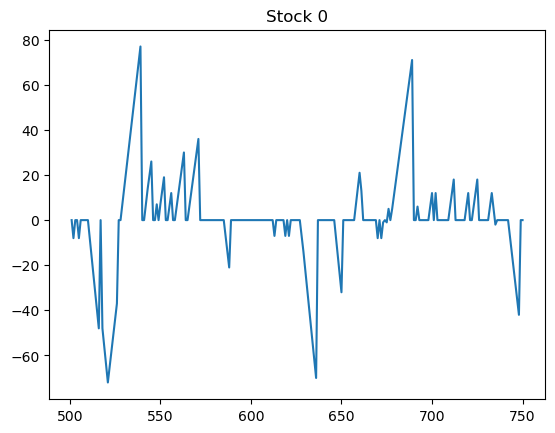

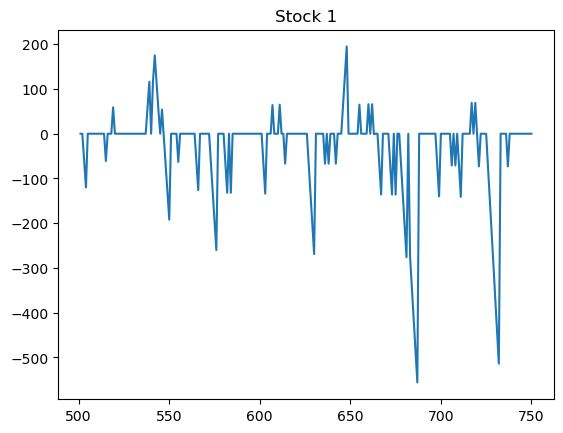

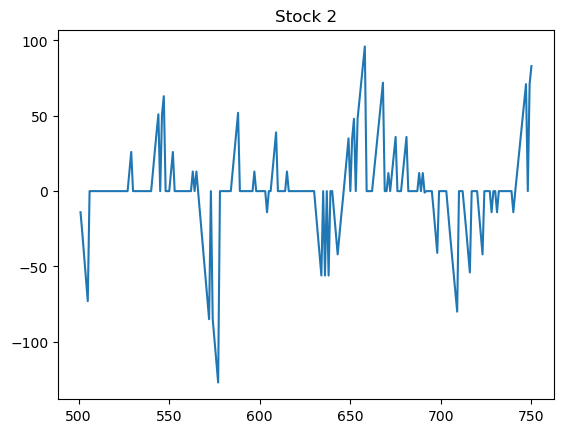

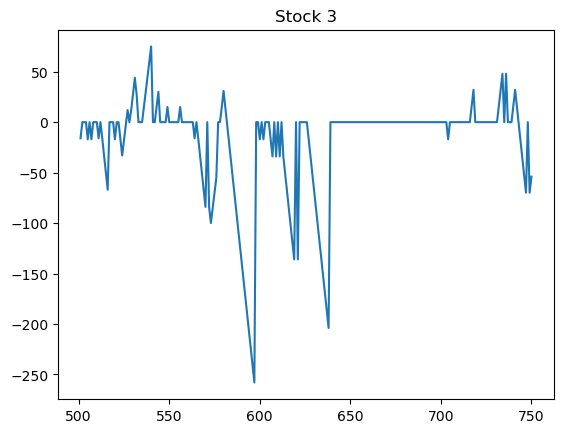

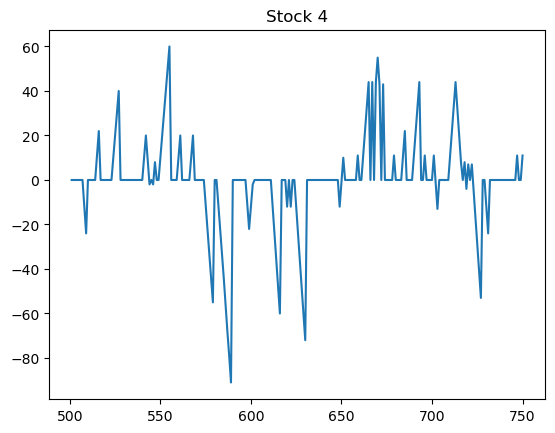

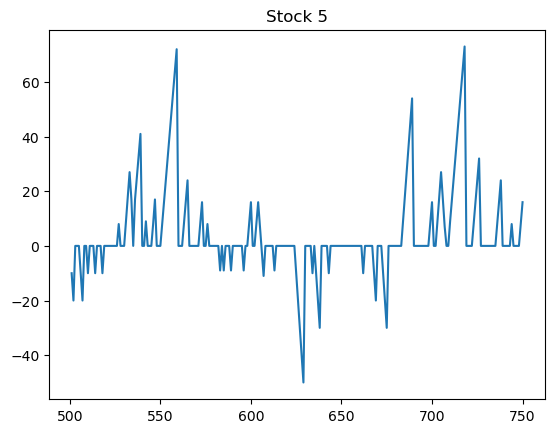

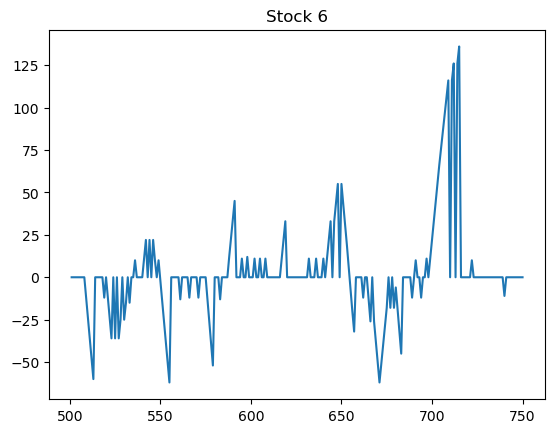

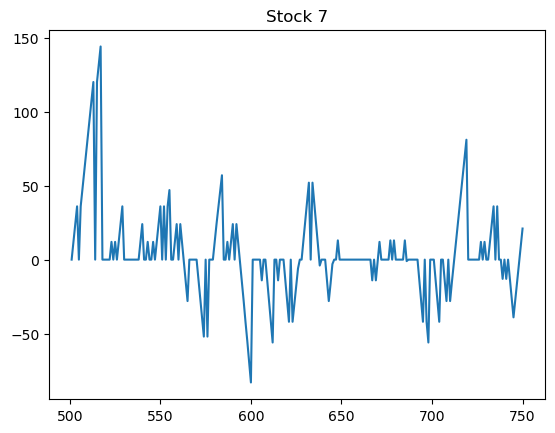

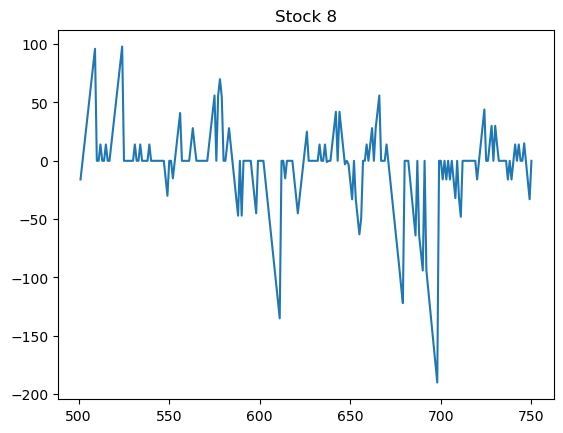

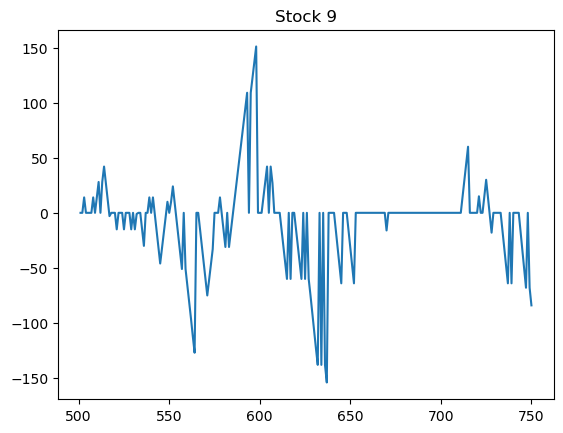

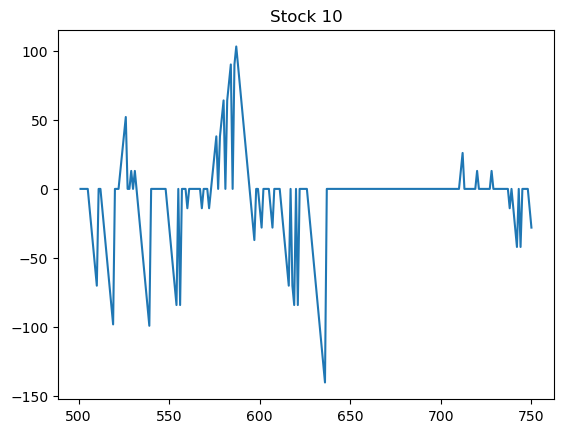

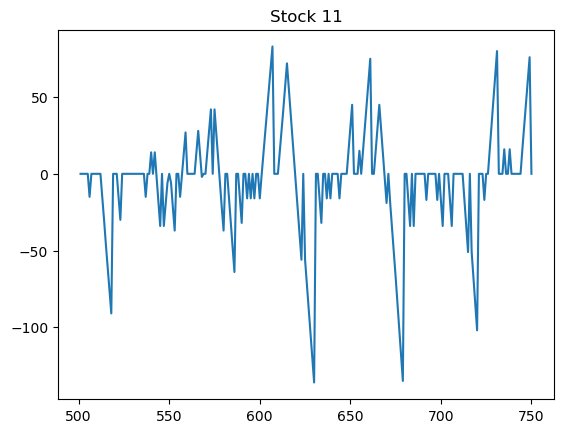

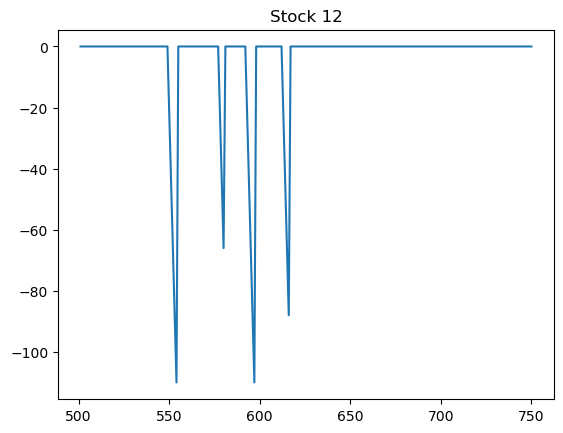

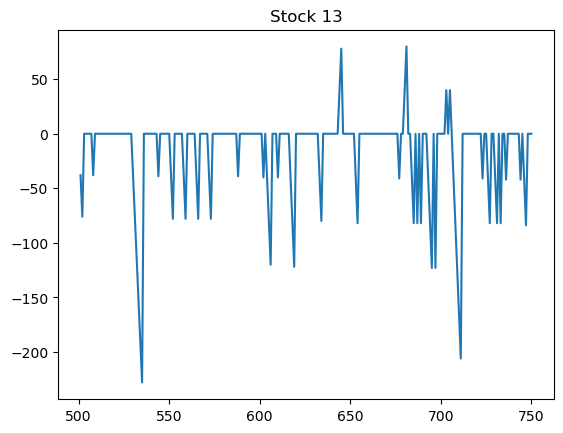

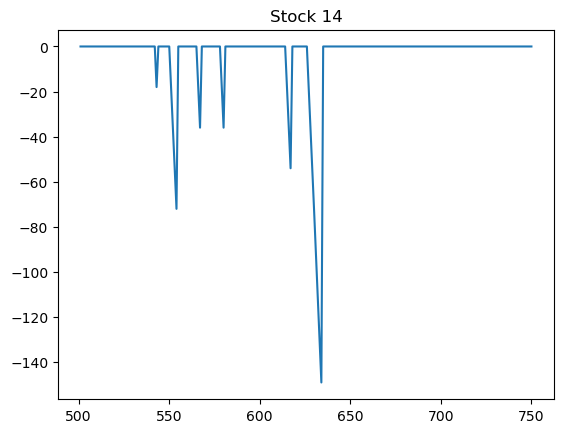

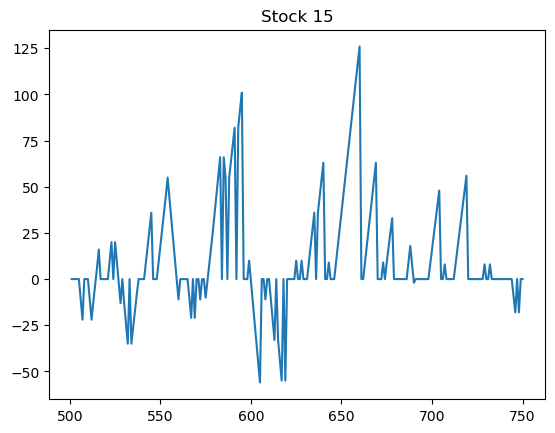

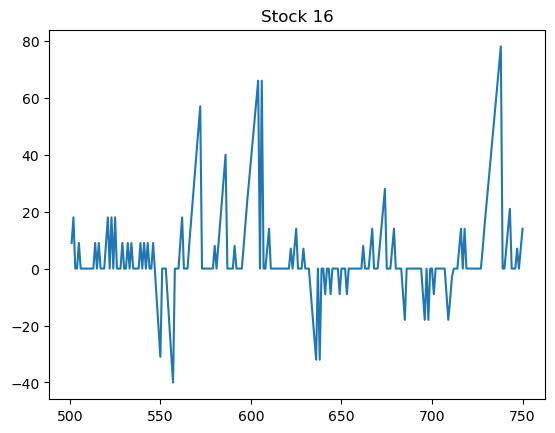

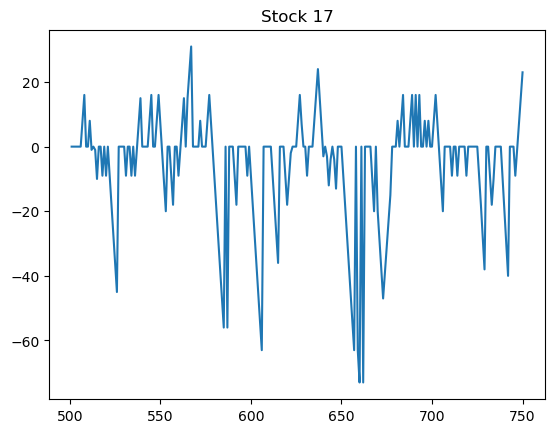

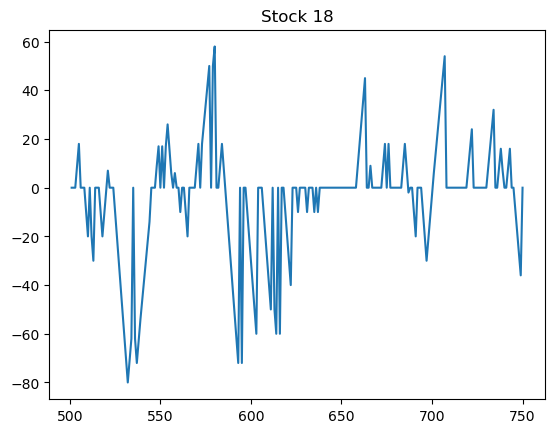

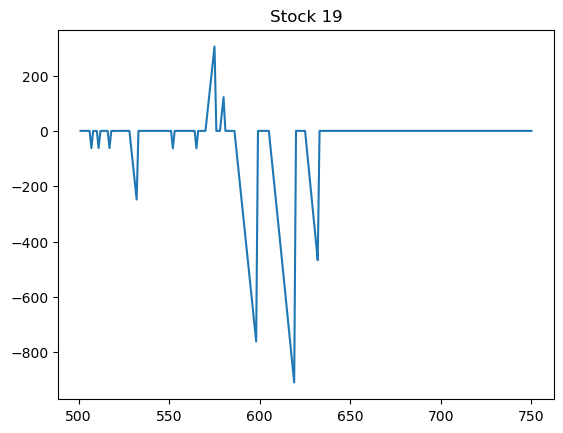

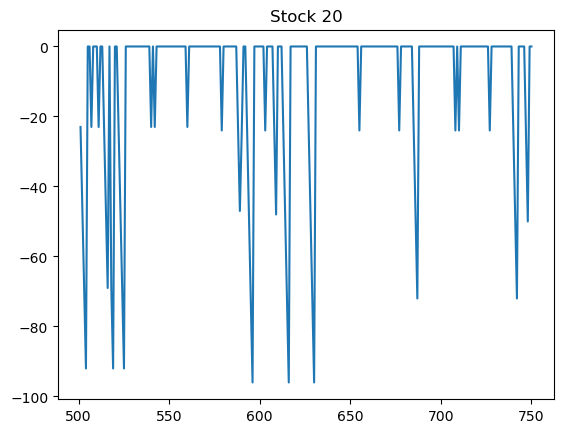

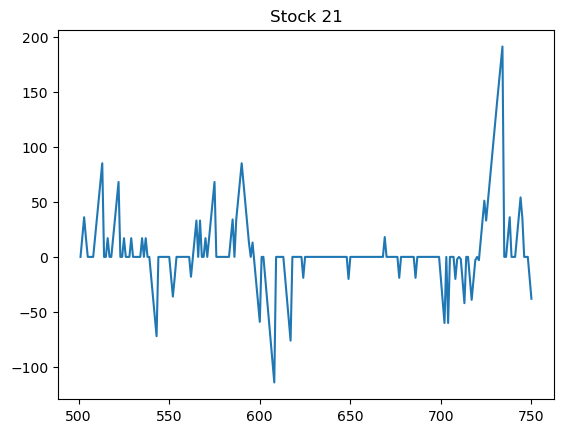

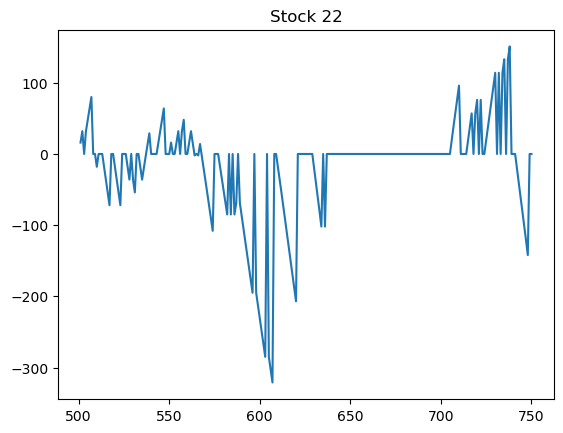

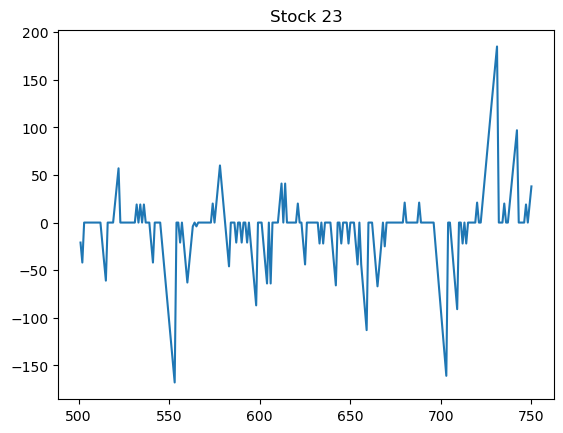

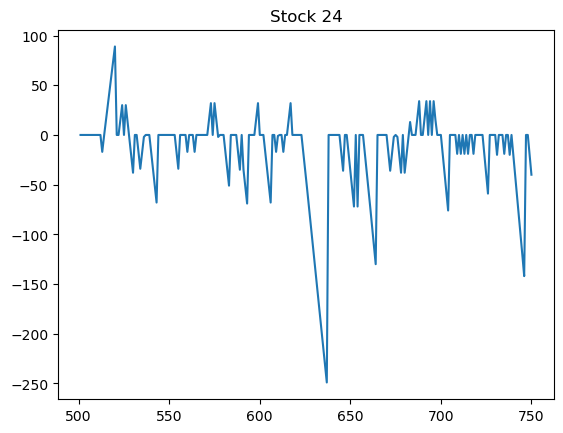

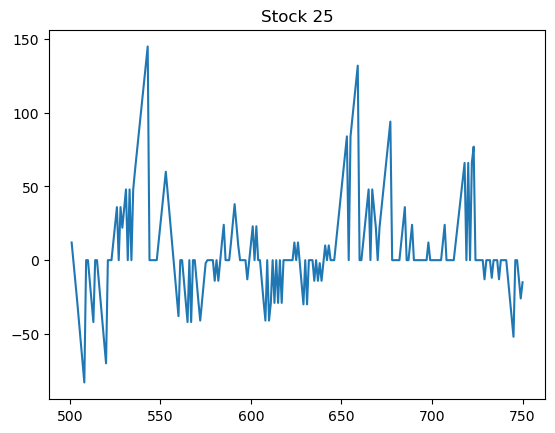

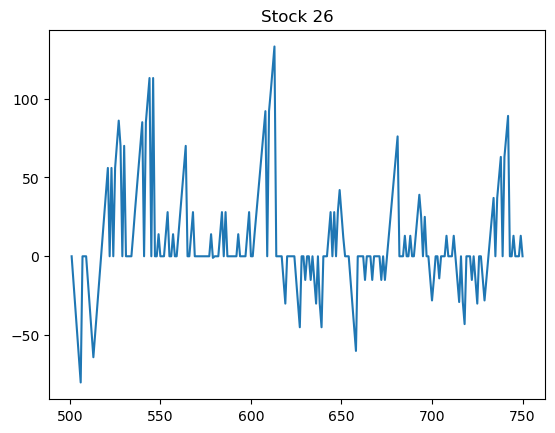

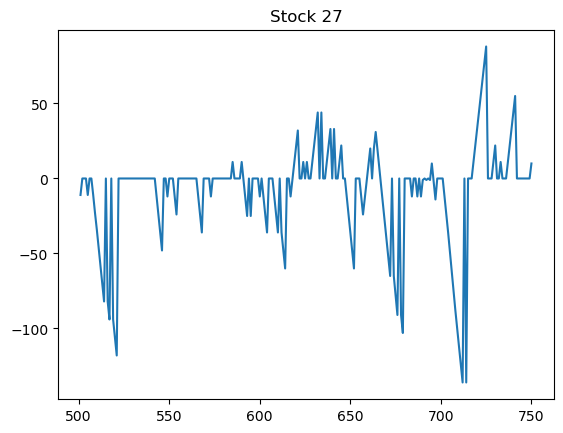

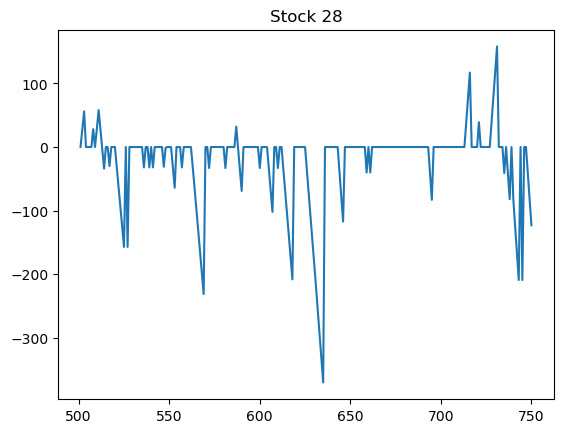

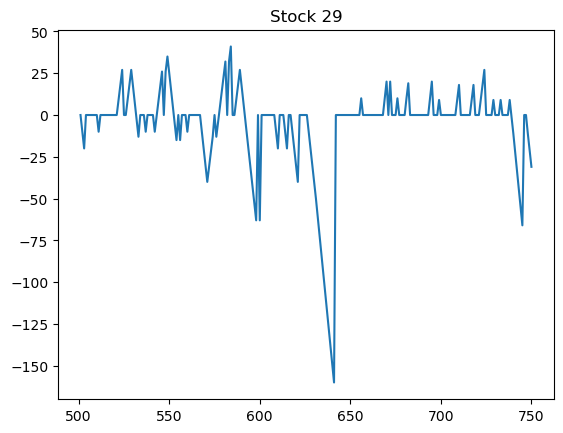

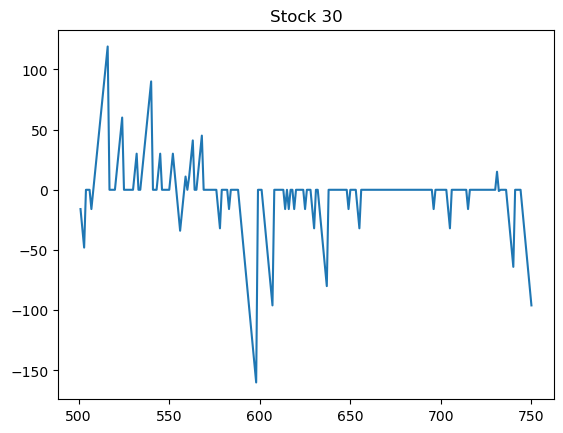

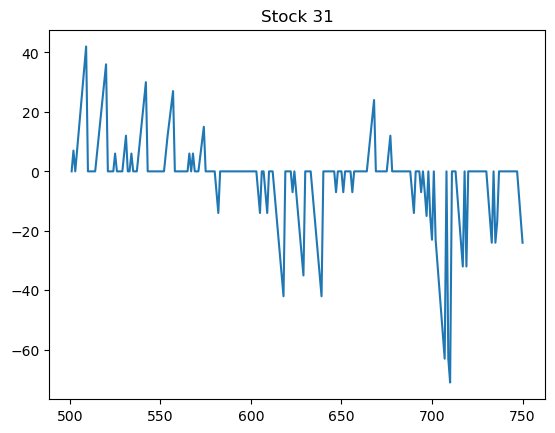

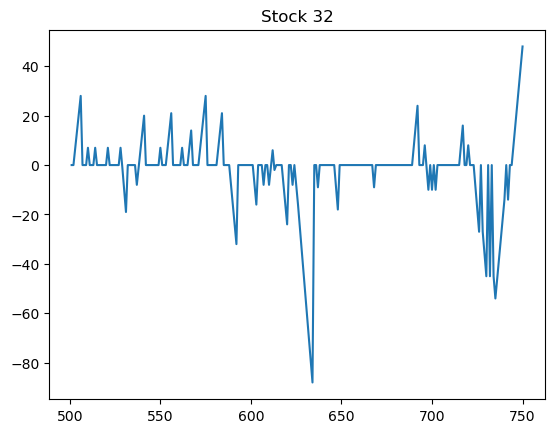

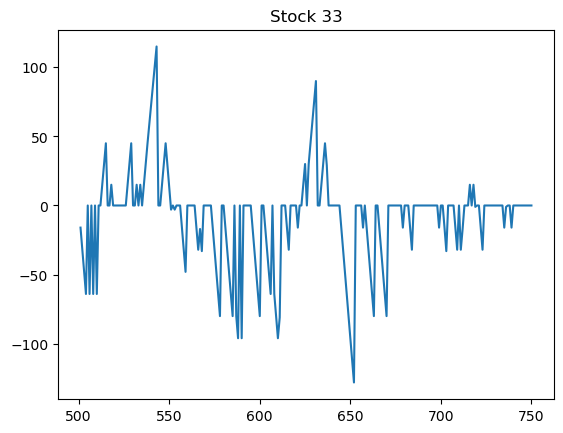

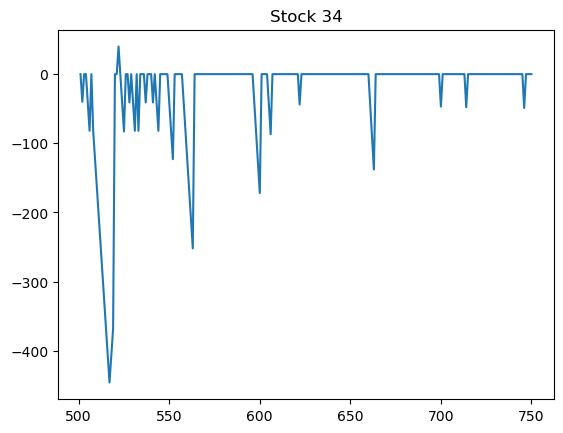

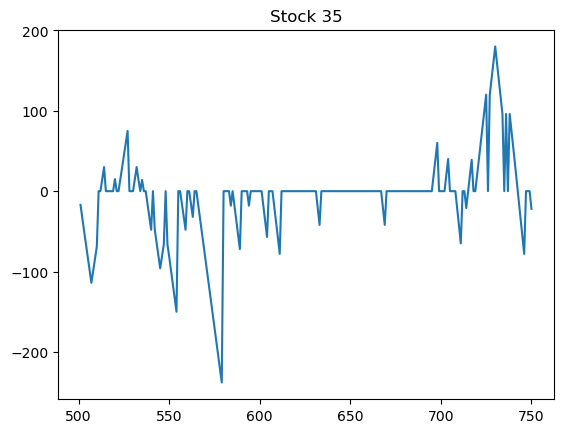

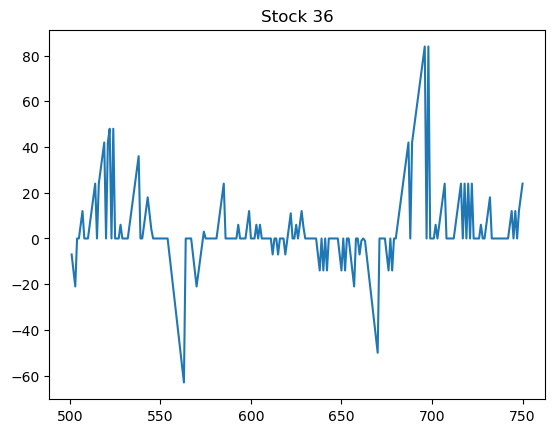

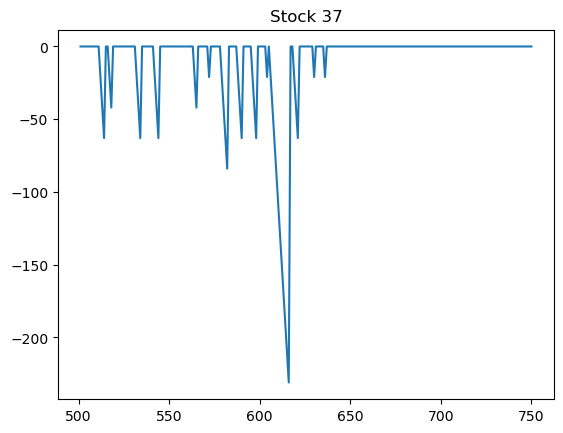

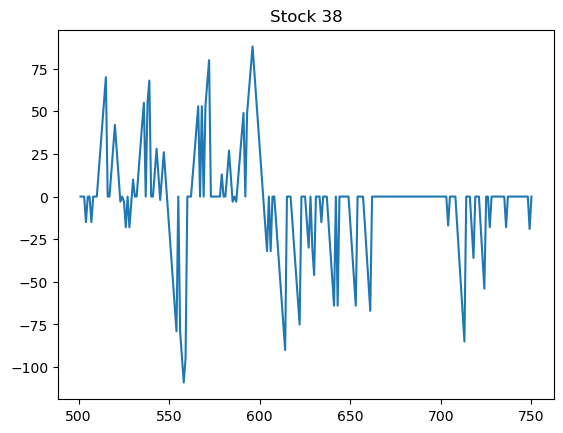

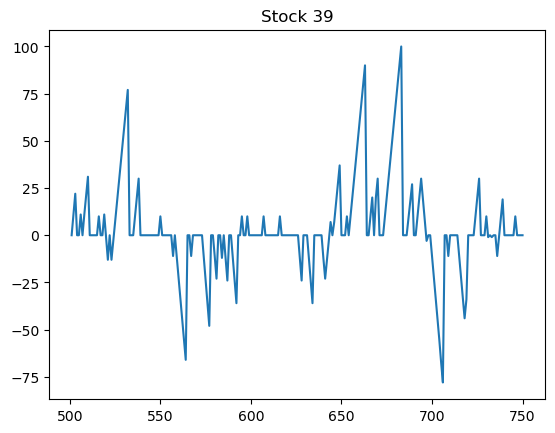

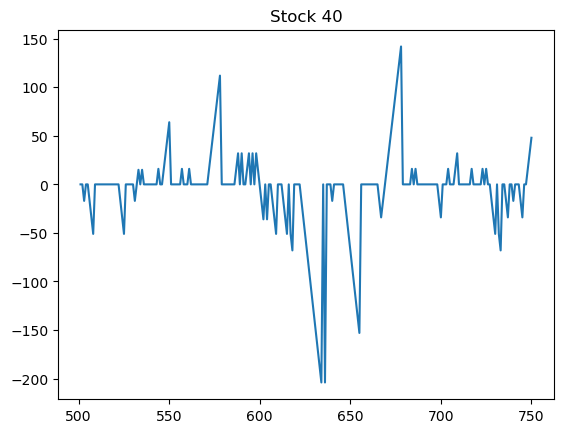

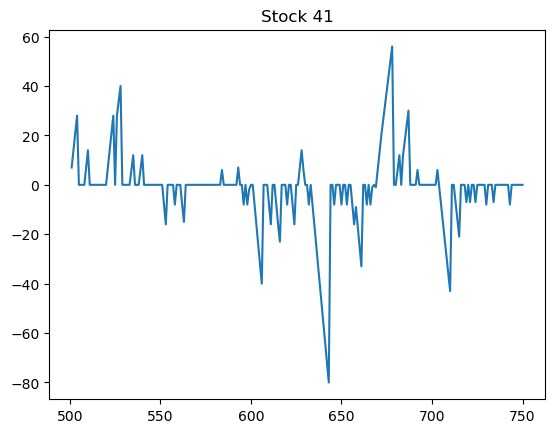

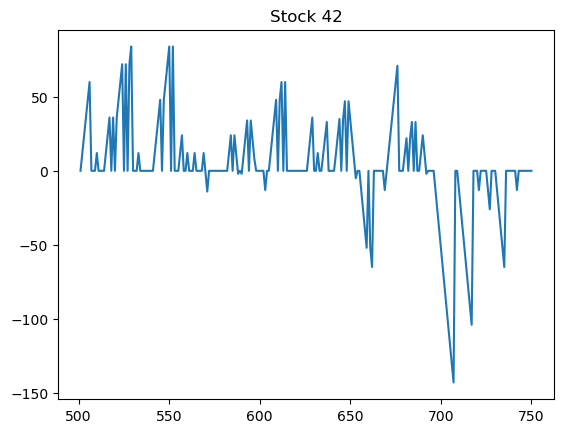

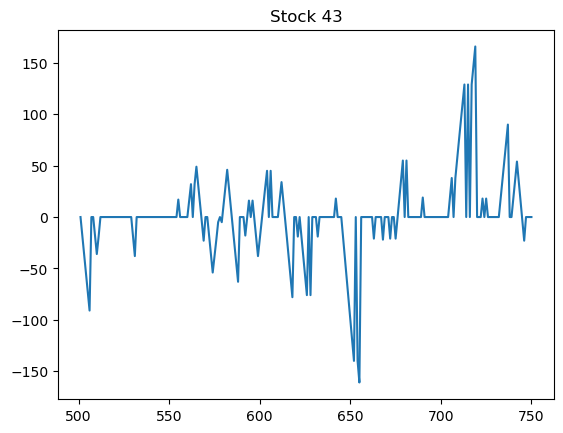

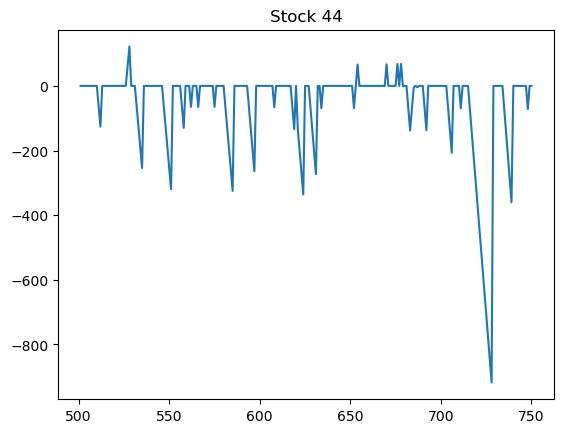

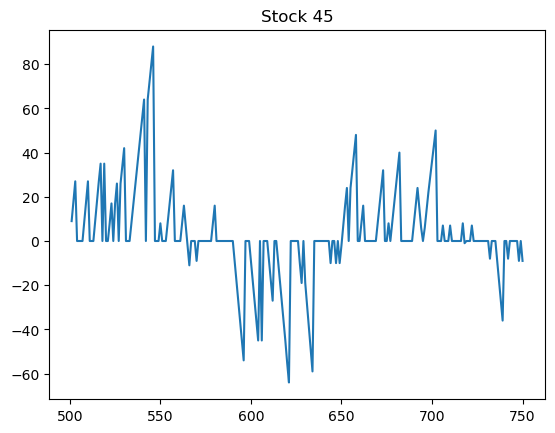

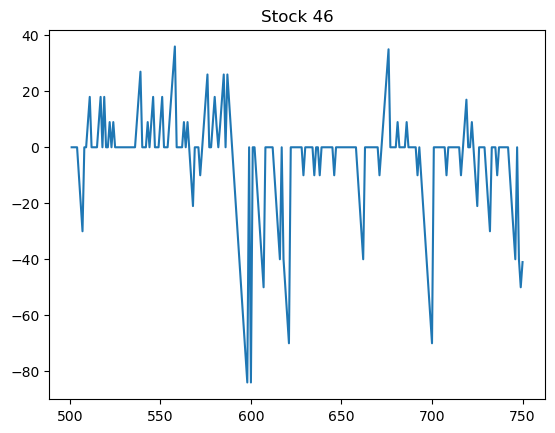

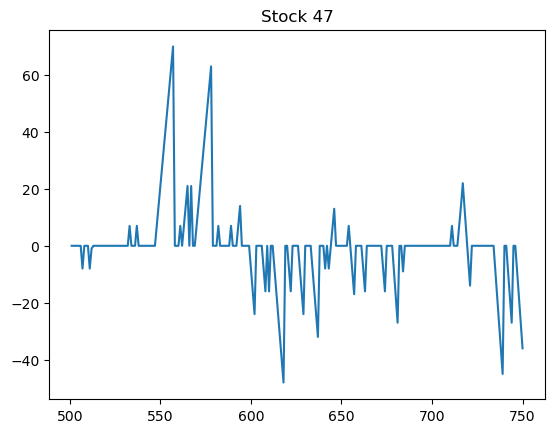

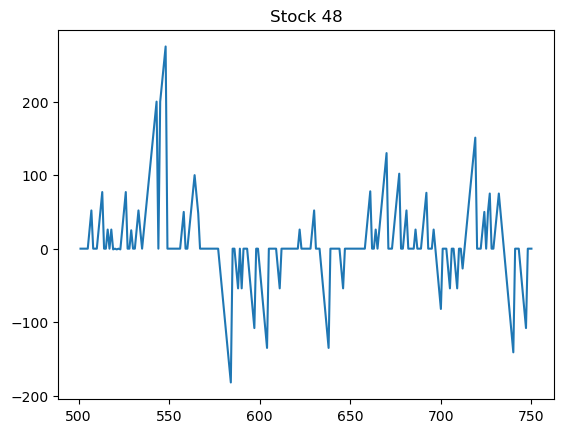

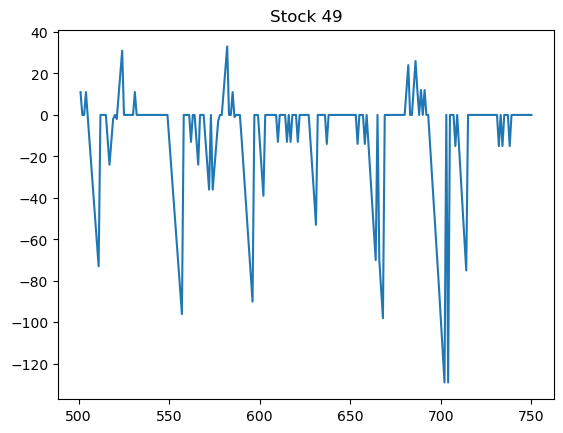

In [3]:
import matplotlib.pyplot as plt

for i in range(0, 50):
    plt.plot(range(501,751), wd[:,i])
    plt.title(f"Stock {i}")
    plt.show()